In [189]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2

In [190]:
data = pd.read_csv('Data/global-energy-substitution.csv')

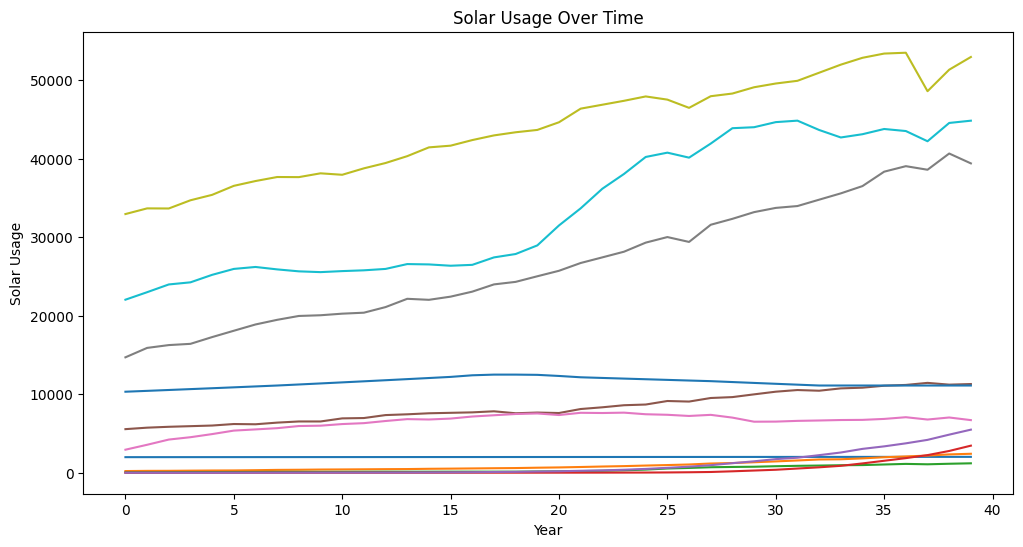

In [191]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Solar Usage')
plt.title('Solar Usage Over Time')
plt.show()


In [192]:
split_fraction = 0.8
split_index = int(split_fraction * len(data))

train_data = data[:split_index]
test_data = data[split_index:]

data.shape

(40, 11)

In [193]:
model = Sequential([
    Dense(512, input_shape=(1,)),
    Dense(128,activation='tanh'),
    Dense(1,activation='tanh')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

amount = train_data['Solar']
time = train_data['Year']
amount_test = test_data['Solar']
time_test = test_data['Year']

model.fit(time, amount, epochs=50, verbose=2)


Epoch 1/50
1/1 - 1s - loss: 17208.8906 - 673ms/epoch - 673ms/step
Epoch 2/50
1/1 - 0s - loss: 17189.5352 - 4ms/epoch - 4ms/step
Epoch 3/50
1/1 - 0s - loss: 17187.9219 - 4ms/epoch - 4ms/step
Epoch 4/50
1/1 - 0s - loss: 17187.5000 - 6ms/epoch - 6ms/step
Epoch 5/50
1/1 - 0s - loss: 17187.3750 - 4ms/epoch - 4ms/step
Epoch 6/50
1/1 - 0s - loss: 17187.2754 - 5ms/epoch - 5ms/step
Epoch 7/50
1/1 - 0s - loss: 17187.1914 - 4ms/epoch - 4ms/step
Epoch 8/50
1/1 - 0s - loss: 17187.1250 - 3ms/epoch - 3ms/step
Epoch 9/50
1/1 - 0s - loss: 17187.0703 - 5ms/epoch - 5ms/step
Epoch 10/50
1/1 - 0s - loss: 17187.0215 - 4ms/epoch - 4ms/step
Epoch 11/50
1/1 - 0s - loss: 17186.9785 - 4ms/epoch - 4ms/step
Epoch 12/50
1/1 - 0s - loss: 17186.9414 - 5ms/epoch - 5ms/step
Epoch 13/50
1/1 - 0s - loss: 17186.9121 - 4ms/epoch - 4ms/step
Epoch 14/50
1/1 - 0s - loss: 17186.8848 - 4ms/epoch - 4ms/step
Epoch 15/50
1/1 - 0s - loss: 17186.8613 - 4ms/epoch - 4ms/step
Epoch 16/50
1/1 - 0s - loss: 17186.6543 - 4ms/epoch - 4ms/st

In [194]:
model.predict(time_test)

1/1 [==============================] - 0s 68ms/step


array([[0.9991839],
       [0.9991839],
       [0.9991839],
       [0.9991839],
       [0.9991839],
       [0.9991839],
       [0.9991839],
       [0.9991839]], dtype=float32)

In [195]:
amount_test

32     689.34564
33     879.17914
34    1185.55150
35    1523.30440
36    1858.95400
37    2243.83500
38    2771.82900
39    3448.23730
Name: Solar, dtype: float64